In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load the datasets
train_data = pd.read_csv('Assignment_Train.csv')
test_data = pd.read_csv('Assignment_Test.csv')
feature_dict = pd.read_excel('Assignment_FeatureDictionary.xlsx')

# Display basic info about the datasets
print(train_data.head())
print(train_data.info())
print(train_data.describe())


   DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE  \
0     106989             07/20/2022        DELHI-SF            DELHI   
1     108975             07/28/2022        PATNA-SF            BIHAR   
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL   
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PRADESH   
4      55095             07/15/2022       MODASA-SF          GUJARAT   

  FIRST NAME MIDDLE NAME  LAST NAME      mobile AADHAR VERIFIED Cibil Score  \
0      SUNIL         NaN    CHANDER  9210574080              NO         726   
1      AMRIT         NaN      KUMAR  8877987018              NO         NaN   
2    ANIMESH         NaN      THAPA  8910862135              NO         737   
3     ADITYA         NaN      SINGH  9758428017              NO         713   
4     PARMAR  HARESHBHAI  AMRUTBHAI  9687028486              NO         669   

   ...  Phone Social Premium.shaadi Phone Social Premium.skype  \
0  ...                    

In [ ]:
# Check data types to find suitable columns for hue
print(train_data.dtypes)


DEALER ID                                int64
APPLICATION LOGIN DATE                  object
HDB BRANCH NAME                         object
HDB BRANCH STATE                        object
FIRST NAME                              object
MIDDLE NAME                             object
LAST NAME                               object
mobile                                   int64
AADHAR VERIFIED                         object
Cibil Score                             object
MOBILE VERIFICATION                       bool
DEALER NAME                             object
TOTAL ASSET COST                       float64
ASSET CTG                               object
ASSET MODEL NO                           int64
APPLIED AMOUNT                           int64
PRIMARY ASSET MAKE                      object
Primary Asset Model No                  object
Personal Email Address                  object
MARITAL STATUS                          object
GENDER                                  object
DOB          

In [ ]:
train_data.isnull().sum()

,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,1
HDB BRANCH STATE,854
FIRST NAME,0
MIDDLE NAME,7145
LAST NAME,681
mobile,0
AADHAR VERIFIED,0
Cibil Score,4297


In [ ]:
train_data.notnull().sum()

,0
DEALER ID,10000
APPLICATION LOGIN DATE,10000
HDB BRANCH NAME,9999
HDB BRANCH STATE,9146
FIRST NAME,10000
MIDDLE NAME,2855
LAST NAME,9319
mobile,10000
AADHAR VERIFIED,10000
Cibil Score,5703


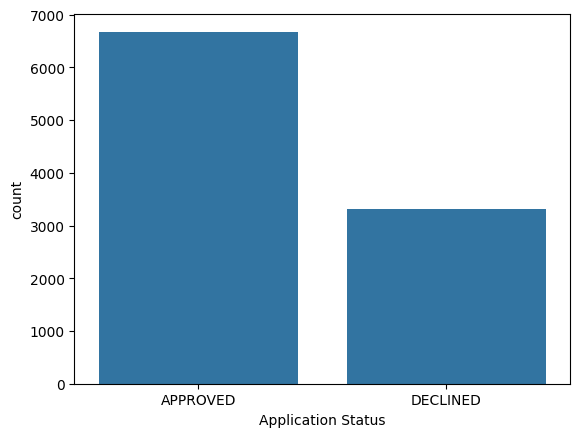

In [ ]:
sns.countplot(x='Application Status', data=train_data)
plt.show()

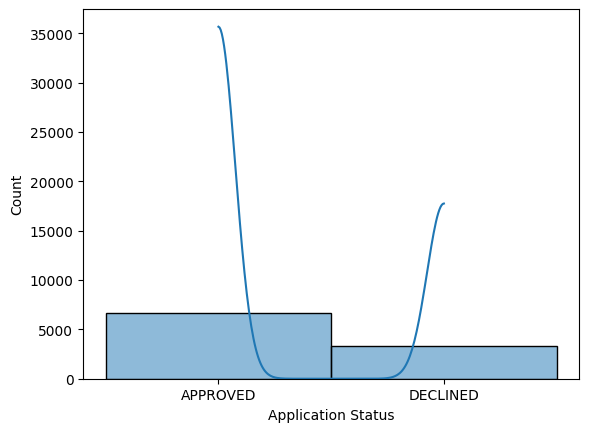

In [ ]:
sns.histplot(data=train_data,x='Application Status', kde=True)
plt.show()

Column 'Date' not found in the DataFrame.
Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.micros

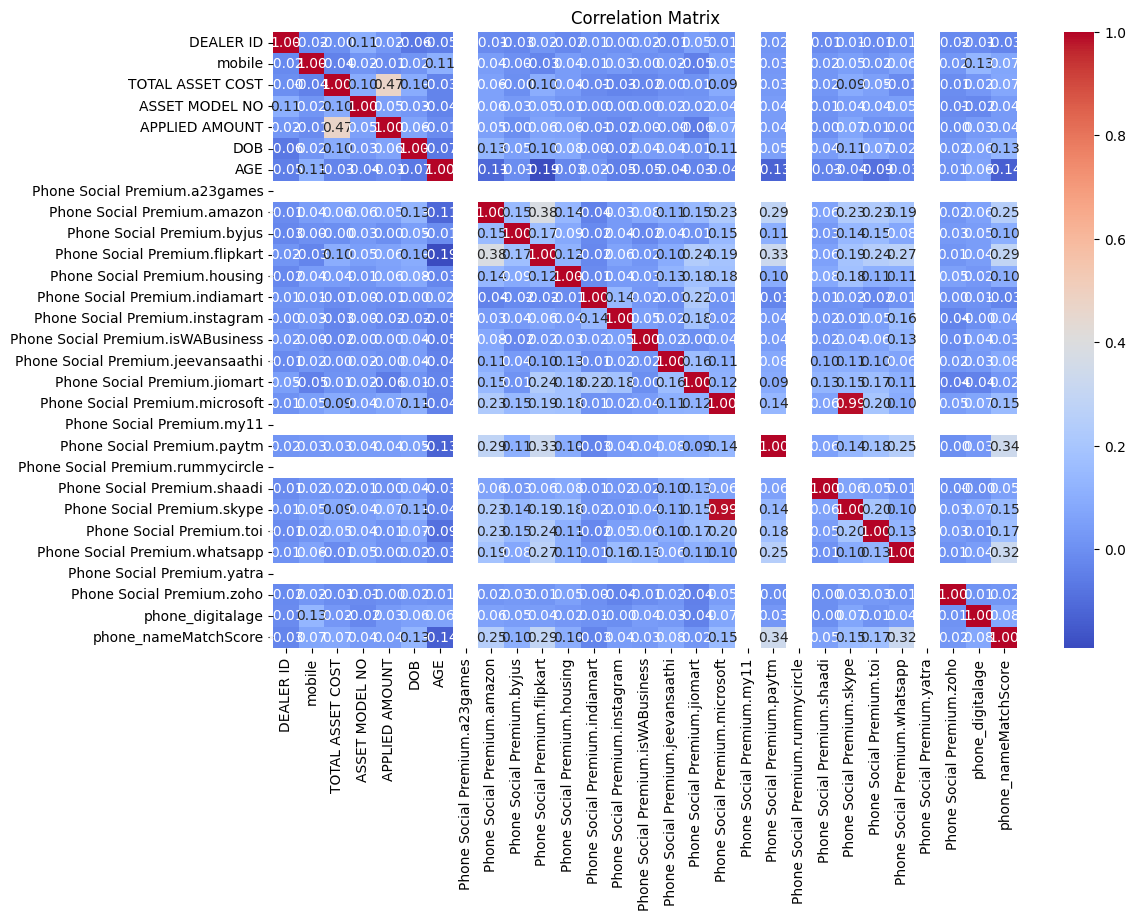

In [ ]:
# Convert 'Date' column to datetime if it exists, handle error otherwise
try:
    train_data['Date'] = pd.to_datetime(train_data['Date'])
except KeyError:
    print("Column 'Date' not found in the DataFrame.")
    # Add debugging or alternative handling here if necessary
    # For example, check the actual column names:
    print(train_data.columns)

# Extract numerical features for correlation analysis
numerical_features = train_data.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Handle missing values
# Convert columns to numeric if possible, otherwise use a different imputation strategy
for col in train_data.columns:
    try:
        train_data[col] = pd.to_numeric(train_data[col])
    except ValueError:
        # Handle columns that cannot be converted to numeric (e.g., fill with mode)
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

# Calculate the mean only for numeric columns
numeric_columns = train_data.select_dtypes(include=np.number).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

# Repeat the same process for test_data
for col in test_data.columns:
    try:
        test_data[col] = pd.to_numeric(test_data[col])
    except ValueError:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

# Calculate the mean only for numeric columns
numeric_columns = test_data.select_dtypes(include=np.number).columns
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Encode categorical features
label_encoder = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    if col != 'Application Status':
        # Fit on the combined data of train and test to capture all possible values
        combined_data = pd.concat([train_data[col], test_data[col]], axis=0)
        label_encoder.fit(combined_data.astype(str))
        train_data[col] = label_encoder.transform(train_data[col].astype(str))
        test_data[col] = label_encoder.transform(test_data[col].astype(str))

# Encode the target variable ('Application Status')
train_data['Application Status'] = label_encoder.fit_transform(train_data['Application Status'])
# Split features and target
X = train_data.drop(columns=['Application Status']) # Remove 'UID' from the list of columns to drop
y = train_data['Application Status']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Standardize the data (optional depending on the model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred = rf_model.predict(X_val_scaled)

# Evaluate the model
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))


Accuracy: 0.8865
Confusion Matrix:
 [[1237   90]
 [ 137  536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1327
           1       0.86      0.80      0.83       673

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.89      0.89      0.89      2000



In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print('Best Parameters:', grid_search.best_params_)

# Train with the best parameters
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_scaled)
print('Tuned Model Accuracy:', accuracy_score(y_val, y_val_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Accuracy: 0.89


In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    # Ensure 'Application Status' is encoded before handling missing values
    if col == 'Application Status':
        train_data[col] = label_encoder.fit_transform(train_data[col])

# Handle missing values after encoding 'Application Status'
for col in train_data.columns:
    try:
        train_data[col] = pd.to_numeric(train_data[col])
    except ValueError:
        # Handle columns that cannot be converted to numeric (e.g., fill with mode)
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

# Calculate the mean only for numeric columns
numeric_columns = train_data.select_dtypes(include=np.number).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

# Repeat the same process for test_data
for col in test_data.columns:
    try:
        test_data[col] = pd.to_numeric(test_data[col])
    except ValueError:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

# Calculate the mean only for numeric columns
numeric_columns = test_data.select_dtypes(include=np.number).columns
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Continue encoding other categorical features
for col in train_data.select_dtypes(include=['object']).columns:
    if col != 'Application Status':
        # Fit on the combined data of train and test to capture all possible values
        combined_data = pd.concat([train_data[col], test_data[col]], axis=0)
        label_encoder.fit(combined_data.astype(str))
        train_data[col] = label_encoder.transform(train_data[col].astype(str))
        test_data[col] = label_encoder.transform(test_data[col].astype(str))

Feature ranking:
1. Feature Cibil Score (0.22947016954358182)
2. Feature TOTAL ASSET COST (0.1420064903686309)
3. Feature ASSET CTG (0.08515032956755011)
4. Feature EMPLOYER NAME (0.08022971177451264)
5. Feature Pan Name (0.03810801258928824)
6. Feature ADDRESS TYPE (0.02847629377371135)
7. Feature AGE (0.022746450330366645)
8. Feature EMPLOY CONSTITUTION (0.021202800813676044)
9. Feature DEALER ID (0.01946970975621328)
10. Feature APPLIED AMOUNT (0.019428866204644565)
11. Feature mobile (0.018308200026154346)
12. Feature LAST NAME (0.017478146960626887)
13. Feature Primary Asset Model No (0.016606274899716125)
14. Feature HDB BRANCH NAME (0.016382478288969132)
15. Feature DEALER NAME (0.01632760030633076)
16. Feature MARITAL STATUS (0.01569171320721802)
17. Feature ASSET MODEL NO (0.015648458546396016)
18. Feature DOB (0.015378521145795404)
19. Feature Personal Email Address (0.015051051809418516)
20. Feature phone_digitalage (0.014393732109607942)
21. Feature name (0.0142655162543226

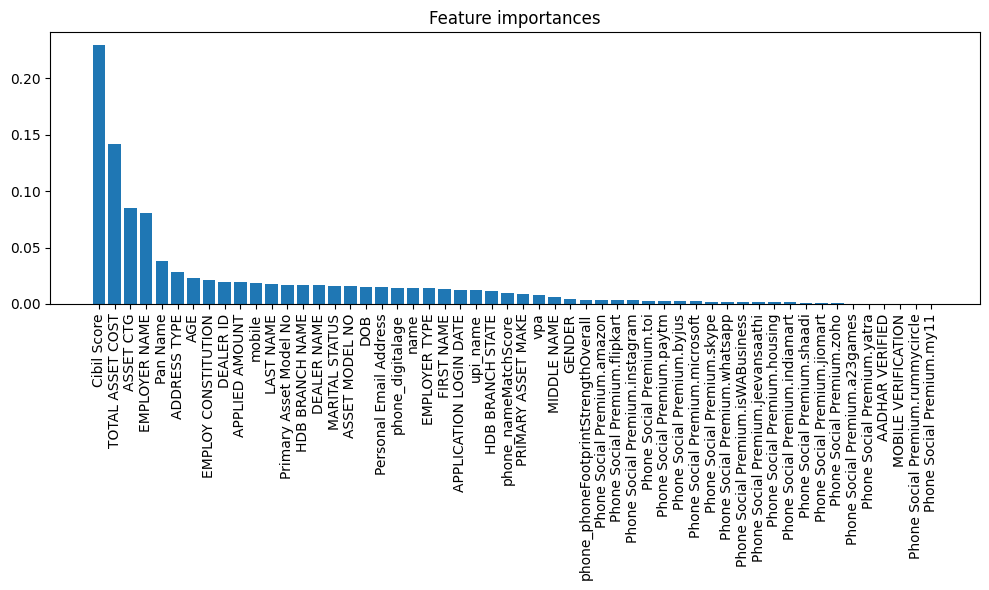

In [ ]:
# Feature importance for Random Forest
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
